In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
df=pd.read_csv(r"C:\Users\abdul\OneDrive\Desktop\ineuronreso\Projects\CROP_RECOMENDATION\Crop_recommendation.csv")
df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [141]:
def df_preprocess(df,column_name):
    df_sh=df.shape
    df_in=df.info()
    df_null=df.isnull().sum()
    df_dup=df.duplicated().sum()
    df_des=df.describe()
    df_plot=sns.boxplot(df[column_name])
    return df_sh,df_in,df_null,df_dup,df_des,df_plot

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


((2200, 8),
 None,
 N              0
 P              0
 K              0
 temperature    0
 humidity       0
 ph             0
 rainfall       0
 label          0
 dtype: int64,
 0,
                  N            P            K  temperature     humidity  \
 count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
 mean     50.551818    53.362727    48.149091    25.616244    71.481779   
 std      36.917334    32.985883    50.647931     5.063749    22.263812   
 min       0.000000     5.000000     5.000000     8.825675    14.258040   
 25%      21.000000    28.000000    20.000000    22.769375    60.261953   
 50%      37.000000    51.000000    32.000000    25.598693    80.473146   
 75%      84.250000    68.000000    49.000000    28.561654    89.948771   
 max     140.000000   145.000000   205.000000    43.675493    99.981876   
 
                 ph     rainfall  
 count  2200.000000  2200.000000  
 mean      6.469480   103.463655  
 std       0.773938    54.958389  
 

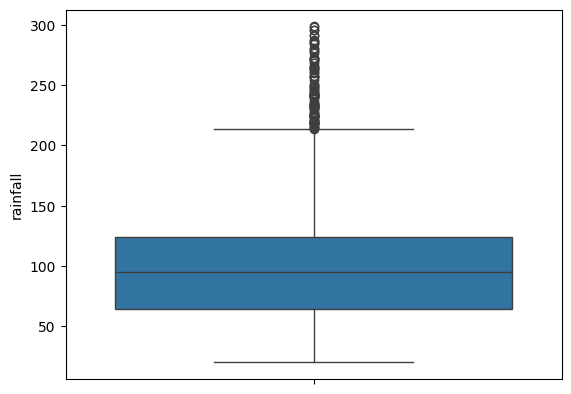

In [142]:
df_preprocess(df,"rainfall")

In [143]:
df["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [144]:
def df_outliers(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    df[column]=np.where(df[column]>=upper_limit,upper_limit,
    np.where(df[column]<=lower_limit,
    lower_limit,df[column]))
    return df[column]

In [145]:
df_outliers(df,"temperature")
df_outliers(df,"rainfall")
df_outliers(df,"humidity")

0       82.002744
1       80.319644
2       82.320763
3       80.158363
4       81.604873
          ...    
2195    66.413269
2196    56.636362
2197    67.225123
2198    52.127394
2199    60.396475
Name: humidity, Length: 2200, dtype: float64

<Axes: ylabel='humidity'>

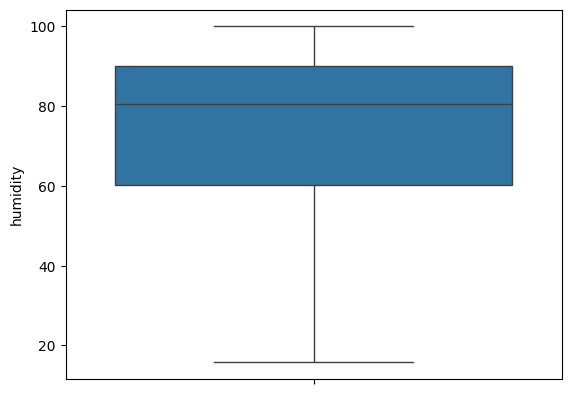

In [146]:
sns.boxplot(df["humidity"])

In [147]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,213.841241,rice
2,60,55,44,23.004459,82.320763,7.840207,213.841241,rice
3,74,35,40,26.491096,80.158363,6.980401,213.841241,rice
4,78,42,42,20.130175,81.604873,7.628473,213.841241,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [148]:
df=df.drop(columns={"N","P","K","ph"})

In [149]:
def encode(df,column):
    from sklearn.preprocessing import LabelEncoder
    lr=LabelEncoder()
    df[column]=lr.fit_transform(df[column])
    return df[column],lr

In [150]:
df["label"],lr=encode(df,"label")

In [151]:
df["label"].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

<Axes: >

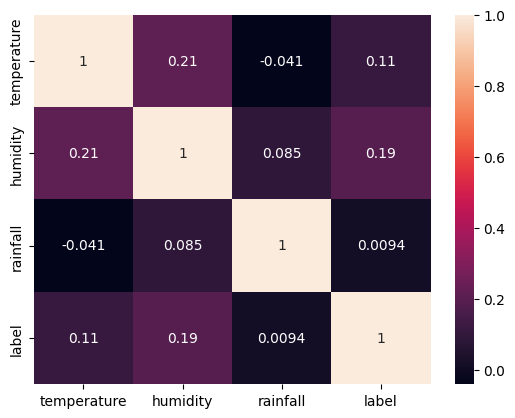

In [152]:
sns.heatmap(df.corr(),annot=True)

In [153]:
X=df.drop(columns="label")
y=df["label"]

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

In [155]:
def model(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
    rf=RandomForestClassifier(max_depth=7,n_estimators=100,random_state=42)
    rf.fit(X_train,y_train)
    y_pred=rf.predict(X_test)
    ac=accuracy_score(y_test,y_pred)
    return rf

In [156]:
rf=model(X,y)

In [157]:
# 🔮 Prediction Function for Top 5 Recommendations for One Query
def recommend_top_5_crops(temperature, humidity,rainfall):
    input_data = np.array([[temperature, humidity,rainfall]])
    prob = rf.predict_proba(input_data)[0]  # Get probabilities for each class
    top_5_indices = np.argsort(prob)[-5:][::-1]  # Get indices of top 5 highest probabilities
    top_5_predictions = lr.inverse_transform(top_5_indices)  # Map indices to crop names
    return top_5_predictions

In [158]:
# ✅ Example Usage: Get 5 Recommendations for One Query
user_crop = recommend_top_5_crops(temperature=23.5, humidity=82.3,rainfall=202.9)
print("Top 5 Recommended Crops:", user_crop)

Top 5 Recommended Crops: ['rice' 'jute' 'cotton' 'coffee' 'banana']


c:\Users\abdul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
